In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset_path = "E:/SIH/archive/Crop Diseases"

batch_size = 32
img_height = 224
img_width = 224

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 13324 files belonging to 17 classes.
Using 10660 files for training.
Found 13324 files belonging to 17 classes.
Using 2664 files for validation.


In [15]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
])


In [16]:
import os

dataset_path = "E:/SIH/archive/Crop Diseases"
num_classes = len(next(os.walk(dataset_path))[1])
print(f"Number of classes: {num_classes}")


Number of classes: 17


In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(img_height, img_width, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # Freeze the base

model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 229s 662ms/step - accuracy: 0.6453 - loss: 1.0910 - val_accuracy: 0.7845 - val_loss: 0.5858
Epoch 2/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 221s 662ms/step - accuracy: 0.7965 - loss: 0.5191 - val_accuracy: 0.8146 - val_loss: 0.4931
Epoch 3/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 221s 660ms/step - accuracy: 0.8114 - loss: 0.4662 - val_accuracy: 0.8007 - val_loss: 0.5002
Epoch 4/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 215s 644ms/step - accuracy: 0.8310 - loss: 0.4206 - val_accuracy: 0.8127 - val_loss: 0.4788
Epoch 5/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 216s 647ms/step - accuracy: 0.8367 - loss: 0.4132 - val_accuracy: 0.8224 - val_loss: 0.4480
Epoch 6/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 215s 643ms/step - accuracy: 0.8356 - loss: 0.4093 - val_accuracy: 0.8236 - val_loss: 0.4791
Epoch 7/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 215s 644ms/step - accuracy: 0.8451 - loss: 0.3858 - val_accuracy: 0.8224 - val_loss: 0.4655
Epoch 8/10
334/334 ━━━━━━━━━━━━━━━━━━━━ 215s 643ms/step - accuracy: 0.8450 -

In [19]:
base_model.trainable = True

# Optionally fine-tune from a specific layer onwards                 
fine_tune_at = 100

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_epochs = 10

history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs + fine_tune_epochs,
    initial_epoch=history.epoch[-1]
)


Epoch 10/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 330s 930ms/step - accuracy: 0.4023 - loss: 3.5136 - val_accuracy: 0.6858 - val_loss: 0.9078
Epoch 11/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 312s 933ms/step - accuracy: 0.7339 - loss: 0.7206 - val_accuracy: 0.7282 - val_loss: 0.7638
Epoch 12/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 312s 934ms/step - accuracy: 0.7801 - loss: 0.5778 - val_accuracy: 0.7624 - val_loss: 0.6275
Epoch 13/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 308s 922ms/step - accuracy: 0.7992 - loss: 0.5152 - val_accuracy: 0.7755 - val_loss: 0.5814
Epoch 14/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 306s 918ms/step - accuracy: 0.8128 - loss: 0.4685 - val_accuracy: 0.8029 - val_loss: 0.4988
Epoch 15/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 301s 901ms/step - accuracy: 0.8317 - loss: 0.4226 - val_accuracy: 0.8134 - val_loss: 0.4722
Epoch 16/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 301s 899ms/step - accuracy: 0.8382 - loss: 0.4153 - val_accuracy: 0.8209 - val_loss: 0.4584
Epoch 17/20
334/334 ━━━━━━━━━━━━━━━━━━━━ 302s 904ms/step - accuracy: 

In [20]:
model.save("crop_disease_classifier.h5")

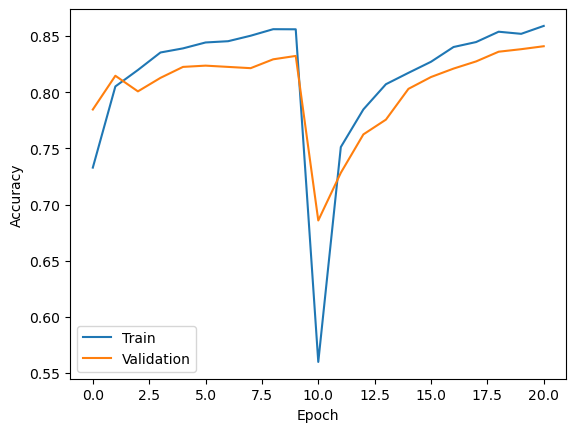

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] + history_fine.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()


In [30]:
model.save('crop_disease_model.keras')
